Product code                            0
Bureau of Meteorology station number    0
Year                                    0
Month                                   0
Mean maximum temperature (°C)           0
Quality                                 0
dtype: int64
(969, 11)
(48, 11)


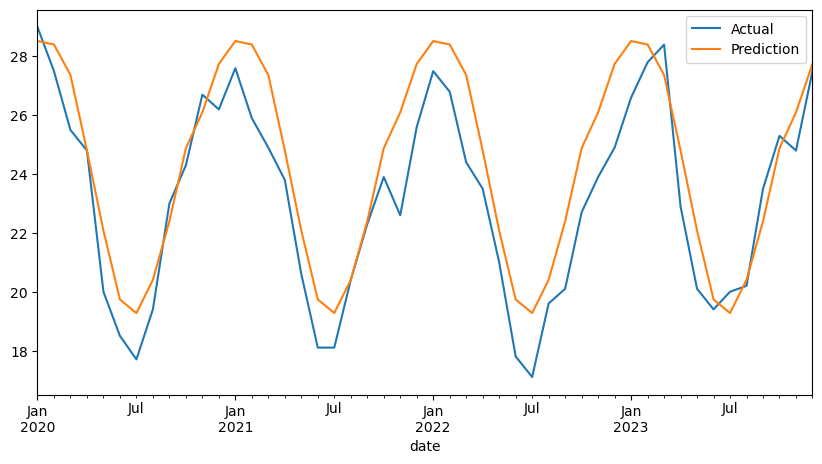

MAE: 1.3450289090474445
MSE: 2.487952871904017
MAPE: 0.059734268787447774
R-squared (r2) value: 0.7714325365099544


In [10]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Sydney Airport TEMP.csv")
print(df.isna().sum())
df.head()

df['date'] = pd.to_datetime(dict(year=df.Year, month=df.Month, day=1))
df["month"] = df["date"].dt.month
df["quarter"] = df["date"].dt.quarter
df["day_of_week"] = df["date"].dt.dayofweek

#def create_lag_features(df1, lags=1):
#  y = df.loc[:, "Mean maximum temperature (°C)"]
#  for lag in range(lags):
#    df1[f"lag_{lag + 1}"] = y.shift(lag + 1)
#  return df1

#df = create_lag_features(df, lags=1)

df.head()

training_mask = df["date"] < "2020-01-1"
training_data = df.loc[training_mask]
print(training_data.shape)

testing_mask = df["date"] >= "2020-01-1"
testing_data = df.loc[testing_mask]
print(testing_data.shape)
training_data = training_data.drop(columns=["date"])
testing_dates = testing_data["date"]
testing_data = testing_data.drop(columns=["date"])

X_train = training_data[[ "month", "quarter", "Year"]]
y_train = training_data["Mean maximum temperature (°C)"]

X_test = testing_data[["month", "quarter", "Year"]]
y_test = testing_data["Mean maximum temperature (°C)"]

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error,\
  mean_squared_error, r2_score

def evaluate_model(y_test, prediction):
  print(f"MAE: {mean_absolute_error(y_test, prediction)}")
  print(f"MSE: {mean_squared_error(y_test, prediction)}")
  print(f"MAPE: {mean_absolute_percentage_error(y_test, prediction)}")
  r2 = r2_score(y_test, prediction)
  print(f"R-squared (r2) value: {r2}")

def plot_predictions(testing_dates, y_test, prediction):
  df_test = pd.DataFrame({"date": testing_dates, "actual": y_test, "prediction": prediction })
  figure, ax = plt.subplots(figsize=(10, 5))
  df_test.plot(ax=ax, label="Actual", x="date", y="actual")
  df_test.plot(ax=ax, label="Prediction", x="date", y="prediction")
  plt.legend(["Actual", "Prediction"])
  plt.show()


from xgboost import XGBRegressor
import lightgbm as lgb
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV

# XGBoost
cv_split = TimeSeriesSplit(n_splits=4, test_size=100)
model = XGBRegressor()
parameters = {
    "max_depth": [3, 4, 6, 5, 10],
    "learning_rate": [0.01, 0.05, 0.1, 0.2, 0.3],
    "n_estimators": [100, 300, 500, 700, 900, 1000],
    "colsample_bytree": [0.3, 0.5, 0.7]
}


grid_search = GridSearchCV(estimator=model, cv=cv_split, param_grid=parameters)
grid_search.fit(X_train, y_train)

# Evaluating GridSearch results
prediction = grid_search.predict(X_test)
plot_predictions(testing_dates, y_test, prediction)
evaluate_model(y_test, prediction)


In [11]:
df.head()

,Product code,Bureau of Meteorology station number,Year,Month,Mean maximum temperature (°C),Quality,date,month,quarter,day_of_week,lag_1
0,IDCJAC0002,66037,1939,4,22.6,Y,1939-04-01,4,2,5,NaN
1,IDCJAC0002,66037,1939,5,20.6,Y,1939-05-01,5,2,0,22.6
2,IDCJAC0002,66037,1939,6,17.5,Y,1939-06-01,6,2,3,20.6
3,IDCJAC0002,66037,1939,7,15.3,Y,1939-07-01,7,3,5,17.5
4,IDCJAC0002,66037,1939,8,18.5,Y,1939-08-01,8,3,1,15.3


In [24]:
df.head()

,Product code,Bureau of Meteorology station number,Year,Month,Mean maximum temperature (°C),Quality,date,month,quarter,day_of_week,...,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12
0,IDCJAC0002,66037,1939,4,22.6,Y,1939-04-01,4,2,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IDCJAC0002,66037,1939,5,20.6,Y,1939-05-01,5,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IDCJAC0002,66037,1939,6,17.5,Y,1939-06-01,6,2,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IDCJAC0002,66037,1939,7,15.3,Y,1939-07-01,7,3,5,...,22.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,IDCJAC0002,66037,1939,8,18.5,Y,1939-08-01,8,3,1,...,20.6,22.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Sydney Airport TEMP.csv")
print(df.isna().sum())
df.head()

df['date'] = pd.to_datetime(dict(year=df.Year, month=df.Month, day=1))
df["month"] = df["date"].dt.month
df["quarter"] = df["date"].dt.quarter
df["day_of_week"] = df["date"].dt.dayofweek

#def create_lag_features(df1, lags=1):
#  y = df.loc[:, "Mean maximum temperature (°C)"]
#  for lag in range(lags):
#    df1[f"lag_{lag + 1}"] = y.shift(lag + 1)
#  return df1

#df = create_lag_features(df, lags=1)

df.head()

Product code                            0
Bureau of Meteorology station number    0
Year                                    0
Month                                   0
Mean maximum temperature (°C)           0
Quality                                 0
dtype: int64


,Product code,Bureau of Meteorology station number,Year,Month,Mean maximum temperature (°C),Quality,date,month,quarter,day_of_week
0,IDCJAC0002,66037,1939,4,22.6,Y,1939-04-01,4,2,5
1,IDCJAC0002,66037,1939,5,20.6,Y,1939-05-01,5,2,0
2,IDCJAC0002,66037,1939,6,17.5,Y,1939-06-01,6,2,3
3,IDCJAC0002,66037,1939,7,15.3,Y,1939-07-01,7,3,5
4,IDCJAC0002,66037,1939,8,18.5,Y,1939-08-01,8,3,1


In [48]:
def create_lag_features(df1, lags=11):
    y = df.loc[:, "Mean maximum temperature (°C)"]
    for lag in range(lags):
     df1[f"lag_{lag + 1}"] = y.shift(11)
    return df1

df = create_lag_features(df, lags=1)


In [49]:
df.head()

,Product code,Bureau of Meteorology station number,Year,Month,Mean maximum temperature (°C),Quality,date,month,quarter,day_of_week,lag_1
0,IDCJAC0002,66037,1939,4,22.6,Y,1939-04-01,4,2,5,NaN
1,IDCJAC0002,66037,1939,5,20.6,Y,1939-05-01,5,2,0,NaN
2,IDCJAC0002,66037,1939,6,17.5,Y,1939-06-01,6,2,3,NaN
3,IDCJAC0002,66037,1939,7,15.3,Y,1939-07-01,7,3,5,NaN
4,IDCJAC0002,66037,1939,8,18.5,Y,1939-08-01,8,3,1,NaN


In [ ]:
Lag of 11

(969, 11)
(48, 11)


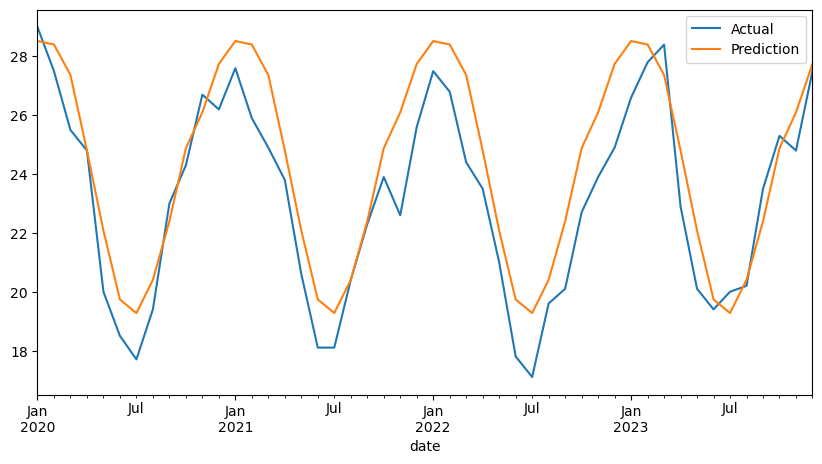

MAE: 1.3450289090474445
MSE: 2.487952871904017
MAPE: 0.059734268787447774
R-squared (r2) value: 0.7714325365099544


In [50]:
training_mask = df["date"] < "2020-01-1"
training_data = df.loc[training_mask]
print(training_data.shape)

testing_mask = df["date"] >= "2020-01-1"
testing_data = df.loc[testing_mask]
print(testing_data.shape)
training_data = training_data.drop(columns=["date"])
testing_dates = testing_data["date"]
testing_data = testing_data.drop(columns=["date"])

X_train = training_data[[ "month", "quarter", "Year"]]
y_train = training_data["Mean maximum temperature (°C)"]

X_test = testing_data[["month", "quarter", "Year"]]
y_test = testing_data["Mean maximum temperature (°C)"]

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error,\
  mean_squared_error, r2_score

def evaluate_model(y_test, prediction):
  print(f"MAE: {mean_absolute_error(y_test, prediction)}")
  print(f"MSE: {mean_squared_error(y_test, prediction)}")
  print(f"MAPE: {mean_absolute_percentage_error(y_test, prediction)}")
  r2 = r2_score(y_test, prediction)
  print(f"R-squared (r2) value: {r2}")

def plot_predictions(testing_dates, y_test, prediction):
  df_test = pd.DataFrame({"date": testing_dates, "actual": y_test, "prediction": prediction })
  figure, ax = plt.subplots(figsize=(10, 5))
  df_test.plot(ax=ax, label="Actual", x="date", y="actual")
  df_test.plot(ax=ax, label="Prediction", x="date", y="prediction")
  plt.legend(["Actual", "Prediction"])
  plt.show()


from xgboost import XGBRegressor
import lightgbm as lgb
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV

# XGBoost
cv_split = TimeSeriesSplit(n_splits=4, test_size=100)
model = XGBRegressor()
parameters = {
    "max_depth": [3, 4, 6, 5, 10],
    "learning_rate": [0.01, 0.05, 0.1, 0.2, 0.3],
    "n_estimators": [100, 300, 500, 700, 900, 1000],
    "colsample_bytree": [0.3, 0.5, 0.7]
}


grid_search = GridSearchCV(estimator=model, cv=cv_split, param_grid=parameters)
grid_search.fit(X_train, y_train)

# Evaluating GridSearch results
prediction = grid_search.predict(X_test)
plot_predictions(testing_dates, y_test, prediction)
evaluate_model(y_test, prediction)

Lag of 12

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Sydney Airport TEMP.csv")
print(df.isna().sum())
df.head()

df['date'] = pd.to_datetime(dict(year=df.Year, month=df.Month, day=1))
df["month"] = df["date"].dt.month
df["quarter"] = df["date"].dt.quarter
df["day_of_week"] = df["date"].dt.dayofweek
def create_lag_features(df1, lags=11):
    y = df.loc[:, "Mean maximum temperature (°C)"]
    for lag in range(lags):
     df1[f"lag_{lag + 1}"] = y.shift(12)
    return df1

df = create_lag_features(df, lags=1)

Product code                            0
Bureau of Meteorology station number    0
Year                                    0
Month                                   0
Mean maximum temperature (°C)           0
Quality                                 0
dtype: int64


In [54]:
df.head()

,Product code,Bureau of Meteorology station number,Year,Month,Mean maximum temperature (°C),Quality,date,month,quarter,day_of_week,lag_1
0,IDCJAC0002,66037,1939,4,22.6,Y,1939-04-01,4,2,5,NaN
1,IDCJAC0002,66037,1939,5,20.6,Y,1939-05-01,5,2,0,NaN
2,IDCJAC0002,66037,1939,6,17.5,Y,1939-06-01,6,2,3,NaN
3,IDCJAC0002,66037,1939,7,15.3,Y,1939-07-01,7,3,5,NaN
4,IDCJAC0002,66037,1939,8,18.5,Y,1939-08-01,8,3,1,NaN


(969, 11)
(48, 11)


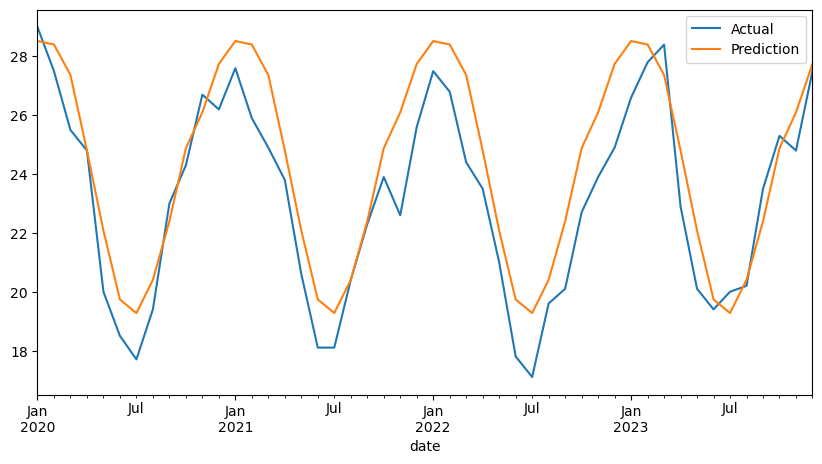

MAE: 1.3450289090474445
MSE: 2.487952871904017
MAPE: 0.059734268787447774
R-squared (r2) value: 0.7714325365099544


In [55]:
training_mask = df["date"] < "2020-01-1"
training_data = df.loc[training_mask]
print(training_data.shape)

testing_mask = df["date"] >= "2020-01-1"
testing_data = df.loc[testing_mask]
print(testing_data.shape)
training_data = training_data.drop(columns=["date"])
testing_dates = testing_data["date"]
testing_data = testing_data.drop(columns=["date"])

X_train = training_data[[ "month", "quarter", "Year"]]
y_train = training_data["Mean maximum temperature (°C)"]

X_test = testing_data[["month", "quarter", "Year"]]
y_test = testing_data["Mean maximum temperature (°C)"]

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error,\
  mean_squared_error, r2_score

def evaluate_model(y_test, prediction):
  print(f"MAE: {mean_absolute_error(y_test, prediction)}")
  print(f"MSE: {mean_squared_error(y_test, prediction)}")
  print(f"MAPE: {mean_absolute_percentage_error(y_test, prediction)}")
  r2 = r2_score(y_test, prediction)
  print(f"R-squared (r2) value: {r2}")

def plot_predictions(testing_dates, y_test, prediction):
  df_test = pd.DataFrame({"date": testing_dates, "actual": y_test, "prediction": prediction })
  figure, ax = plt.subplots(figsize=(10, 5))
  df_test.plot(ax=ax, label="Actual", x="date", y="actual")
  df_test.plot(ax=ax, label="Prediction", x="date", y="prediction")
  plt.legend(["Actual", "Prediction"])
  plt.show()


from xgboost import XGBRegressor
import lightgbm as lgb
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV

# XGBoost
cv_split = TimeSeriesSplit(n_splits=4, test_size=100)
model = XGBRegressor()
parameters = {
    "max_depth": [3, 4, 6, 5, 10],
    "learning_rate": [0.01, 0.05, 0.1, 0.2, 0.3],
    "n_estimators": [100, 300, 500, 700, 900, 1000],
    "colsample_bytree": [0.3, 0.5, 0.7]
}


grid_search = GridSearchCV(estimator=model, cv=cv_split, param_grid=parameters)
grid_search.fit(X_train, y_train)

# Evaluating GridSearch results
prediction = grid_search.predict(X_test)
plot_predictions(testing_dates, y_test, prediction)
evaluate_model(y_test, prediction)

In [ ]:
Model performance varying XGBoost parameters.

Product code                            0
Bureau of Meteorology station number    0
Year                                    0
Month                                   0
Mean maximum temperature (°C)           0
Quality                                 0
dtype: int64
(969, 11)
(48, 11)


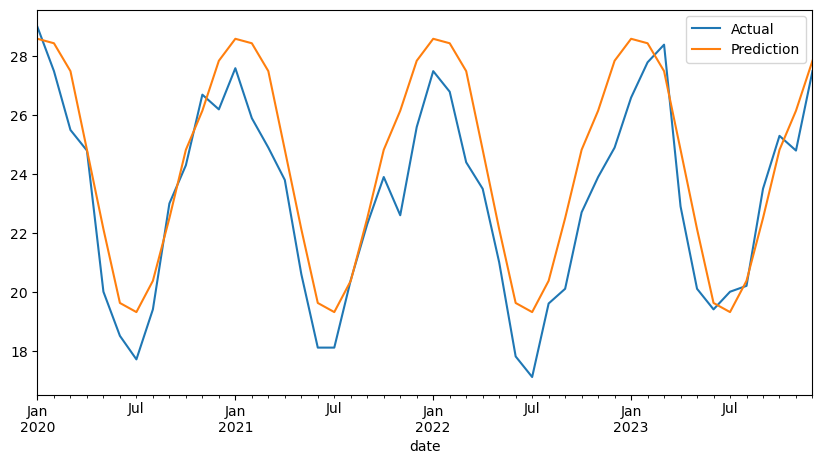

MAE: 1.362722285588582
MSE: 2.5866121815258882
MAPE: 0.06035936113047588
R-squared (r2) value: 0.762368736144358


In [56]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Sydney Airport TEMP.csv")
print(df.isna().sum())
df.head()

df['date'] = pd.to_datetime(dict(year=df.Year, month=df.Month, day=1))
df["month"] = df["date"].dt.month
df["quarter"] = df["date"].dt.quarter
df["day_of_week"] = df["date"].dt.dayofweek

def create_lag_features(df1, lags=1):
  y = df.loc[:, "Mean maximum temperature (°C)"]
  for lag in range(lags):
    df1[f"lag_{lag + 1}"] = y.shift(lag + 1)
  return df1

df = create_lag_features(df, lags=1)

df.head()

training_mask = df["date"] < "2020-01-1"
training_data = df.loc[training_mask]
print(training_data.shape)

testing_mask = df["date"] >= "2020-01-1"
testing_data = df.loc[testing_mask]
print(testing_data.shape)
training_data = training_data.drop(columns=["date"])
testing_dates = testing_data["date"]
testing_data = testing_data.drop(columns=["date"])

X_train = training_data[[ "month", "quarter", "Year"]]
y_train = training_data["Mean maximum temperature (°C)"]

X_test = testing_data[["month", "quarter", "Year"]]
y_test = testing_data["Mean maximum temperature (°C)"]

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error,\
  mean_squared_error, r2_score

def evaluate_model(y_test, prediction):
  print(f"MAE: {mean_absolute_error(y_test, prediction)}")
  print(f"MSE: {mean_squared_error(y_test, prediction)}")
  print(f"MAPE: {mean_absolute_percentage_error(y_test, prediction)}")
  r2 = r2_score(y_test, prediction)
  print(f"R-squared (r2) value: {r2}")

def plot_predictions(testing_dates, y_test, prediction):
  df_test = pd.DataFrame({"date": testing_dates, "actual": y_test, "prediction": prediction })
  figure, ax = plt.subplots(figsize=(10, 5))
  df_test.plot(ax=ax, label="Actual", x="date", y="actual")
  df_test.plot(ax=ax, label="Prediction", x="date", y="prediction")
  plt.legend(["Actual", "Prediction"])
  plt.show()


from xgboost import XGBRegressor
import lightgbm as lgb
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV

# XGBoost
cv_split = TimeSeriesSplit(n_splits=4, test_size=100)
model = XGBRegressor()
parameters = {
    "max_depth": [1, 2, 5, 7, 9],
    "learning_rate": [0.01, 0.05, 0.1, 0.2, 0.3],
    "n_estimators": [100, 300, 500, 700, 900, 1000],
    "colsample_bytree": [0.3, 0.5, 0.7]
}


grid_search = GridSearchCV(estimator=model, cv=cv_split, param_grid=parameters)
grid_search.fit(X_train, y_train)

# Evaluating GridSearch results
prediction = grid_search.predict(X_test)
plot_predictions(testing_dates, y_test, prediction)
evaluate_model(y_test, prediction)

Product code                            0
Bureau of Meteorology station number    0
Year                                    0
Month                                   0
Mean maximum temperature (°C)           0
Quality                                 0
dtype: int64
(969, 11)
(48, 11)


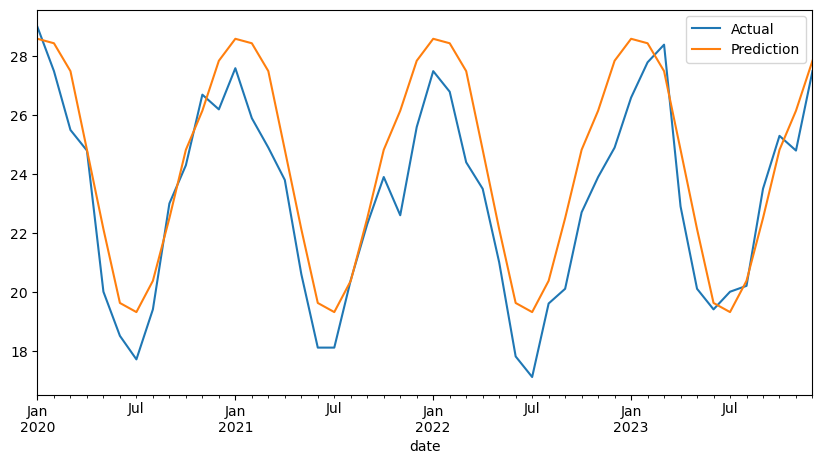

MAE: 1.362722285588582
MSE: 2.5866121815258882
MAPE: 0.06035936113047588
R-squared (r2) value: 0.762368736144358


In [57]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Sydney Airport TEMP.csv")
print(df.isna().sum())
df.head()

df['date'] = pd.to_datetime(dict(year=df.Year, month=df.Month, day=1))
df["month"] = df["date"].dt.month
df["quarter"] = df["date"].dt.quarter
df["day_of_week"] = df["date"].dt.dayofweek

def create_lag_features(df1, lags=1):
  y = df.loc[:, "Mean maximum temperature (°C)"]
  for lag in range(lags):
    df1[f"lag_{lag + 1}"] = y.shift(lag + 1)
  return df1

df = create_lag_features(df, lags=1)

df.head()

training_mask = df["date"] < "2020-01-1"
training_data = df.loc[training_mask]
print(training_data.shape)

testing_mask = df["date"] >= "2020-01-1"
testing_data = df.loc[testing_mask]
print(testing_data.shape)
training_data = training_data.drop(columns=["date"])
testing_dates = testing_data["date"]
testing_data = testing_data.drop(columns=["date"])

X_train = training_data[[ "month", "quarter", "Year"]]
y_train = training_data["Mean maximum temperature (°C)"]

X_test = testing_data[["month", "quarter", "Year"]]
y_test = testing_data["Mean maximum temperature (°C)"]

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error,\
  mean_squared_error, r2_score

def evaluate_model(y_test, prediction):
  print(f"MAE: {mean_absolute_error(y_test, prediction)}")
  print(f"MSE: {mean_squared_error(y_test, prediction)}")
  print(f"MAPE: {mean_absolute_percentage_error(y_test, prediction)}")
  r2 = r2_score(y_test, prediction)
  print(f"R-squared (r2) value: {r2}")

def plot_predictions(testing_dates, y_test, prediction):
  df_test = pd.DataFrame({"date": testing_dates, "actual": y_test, "prediction": prediction })
  figure, ax = plt.subplots(figsize=(10, 5))
  df_test.plot(ax=ax, label="Actual", x="date", y="actual")
  df_test.plot(ax=ax, label="Prediction", x="date", y="prediction")
  plt.legend(["Actual", "Prediction"])
  plt.show()


from xgboost import XGBRegressor
import lightgbm as lgb
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV

# XGBoost
cv_split = TimeSeriesSplit(n_splits=4, test_size=100)
model = XGBRegressor()
parameters = {
    "max_depth": [1, 2, 5, 10, 15],
    "learning_rate": [0.01, 0.05, 0.1, 0.2, 0.3],
    "n_estimators": [100, 300, 500, 700, 900, 1000],
    "colsample_bytree": [0.3, 0.5, 0.7]
}


grid_search = GridSearchCV(estimator=model, cv=cv_split, param_grid=parameters)
grid_search.fit(X_train, y_train)

# Evaluating GridSearch results
prediction = grid_search.predict(X_test)
plot_predictions(testing_dates, y_test, prediction)
evaluate_model(y_test, prediction)

Model performance varying XgBoost parameters

Product code                            0
Bureau of Meteorology station number    0
Year                                    0
Month                                   0
Mean maximum temperature (°C)           0
Quality                                 0
dtype: int64
(969, 11)
(48, 11)


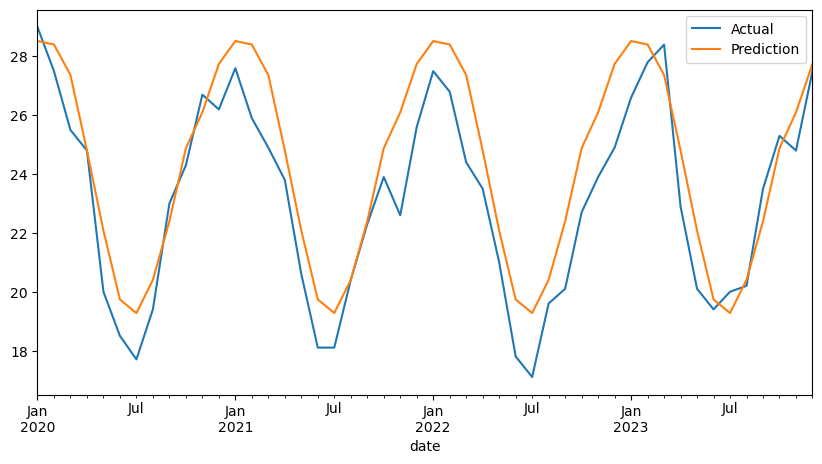

MAE: 1.3450289090474445
MSE: 2.487952871904017
MAPE: 0.059734268787447774
R-squared (r2) value: 0.7714325365099544


In [58]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Sydney Airport TEMP.csv")
print(df.isna().sum())
df.head()

df['date'] = pd.to_datetime(dict(year=df.Year, month=df.Month, day=1))
df["month"] = df["date"].dt.month
df["quarter"] = df["date"].dt.quarter
df["day_of_week"] = df["date"].dt.dayofweek

def create_lag_features(df1, lags=1):
  y = df.loc[:, "Mean maximum temperature (°C)"]
  for lag in range(lags):
    df1[f"lag_{lag + 1}"] = y.shift(lag + 1)
  return df1

df = create_lag_features(df, lags=1)

df.head()

training_mask = df["date"] < "2020-01-1"
training_data = df.loc[training_mask]
print(training_data.shape)

testing_mask = df["date"] >= "2020-01-1"
testing_data = df.loc[testing_mask]
print(testing_data.shape)
training_data = training_data.drop(columns=["date"])
testing_dates = testing_data["date"]
testing_data = testing_data.drop(columns=["date"])

X_train = training_data[[ "month", "quarter", "Year"]]
y_train = training_data["Mean maximum temperature (°C)"]

X_test = testing_data[["month", "quarter", "Year"]]
y_test = testing_data["Mean maximum temperature (°C)"]

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error,\
  mean_squared_error, r2_score

def evaluate_model(y_test, prediction):
  print(f"MAE: {mean_absolute_error(y_test, prediction)}")
  print(f"MSE: {mean_squared_error(y_test, prediction)}")
  print(f"MAPE: {mean_absolute_percentage_error(y_test, prediction)}")
  r2 = r2_score(y_test, prediction)
  print(f"R-squared (r2) value: {r2}")

def plot_predictions(testing_dates, y_test, prediction):
  df_test = pd.DataFrame({"date": testing_dates, "actual": y_test, "prediction": prediction })
  figure, ax = plt.subplots(figsize=(10, 5))
  df_test.plot(ax=ax, label="Actual", x="date", y="actual")
  df_test.plot(ax=ax, label="Prediction", x="date", y="prediction")
  plt.legend(["Actual", "Prediction"])
  plt.show()


from xgboost import XGBRegressor
import lightgbm as lgb
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV

# XGBoost
cv_split = TimeSeriesSplit(n_splits=4, test_size=100)
model = XGBRegressor()
parameters = {
    "max_depth": [3, 4, 6, 5, 20],
    "learning_rate": [0.01, 0.05, 0.1, 0.2, 0.3],
    "n_estimators": [100, 300, 500, 700, 900, 1000],
    "colsample_bytree": [0.3, 0.5, 0.7]
}


grid_search = GridSearchCV(estimator=model, cv=cv_split, param_grid=parameters)
grid_search.fit(X_train, y_train)

# Evaluating GridSearch results
prediction = grid_search.predict(X_test)
plot_predictions(testing_dates, y_test, prediction)
evaluate_model(y_test, prediction)

Model performance varying XgBoost parameters 

Product code                            0
Bureau of Meteorology station number    0
Year                                    0
Month                                   0
Mean maximum temperature (°C)           0
Quality                                 0
dtype: int64
(969, 11)
(48, 11)


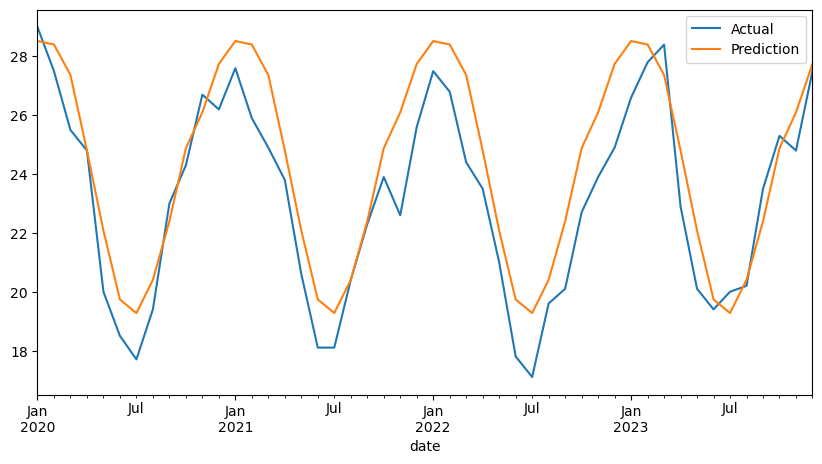

MAE: 1.3450289090474445
MSE: 2.487952871904017
MAPE: 0.059734268787447774
R-squared (r2) value: 0.7714325365099544


In [59]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Sydney Airport TEMP.csv")
print(df.isna().sum())
df.head()

df['date'] = pd.to_datetime(dict(year=df.Year, month=df.Month, day=1))
df["month"] = df["date"].dt.month
df["quarter"] = df["date"].dt.quarter
df["day_of_week"] = df["date"].dt.dayofweek

def create_lag_features(df1, lags=1):
  y = df.loc[:, "Mean maximum temperature (°C)"]
  for lag in range(lags):
    df1[f"lag_{lag + 1}"] = y.shift(lag + 1)
  return df1

df = create_lag_features(df, lags=1)

df.head()

training_mask = df["date"] < "2020-01-1"
training_data = df.loc[training_mask]
print(training_data.shape)

testing_mask = df["date"] >= "2020-01-1"
testing_data = df.loc[testing_mask]
print(testing_data.shape)
training_data = training_data.drop(columns=["date"])
testing_dates = testing_data["date"]
testing_data = testing_data.drop(columns=["date"])

X_train = training_data[[ "month", "quarter", "Year"]]
y_train = training_data["Mean maximum temperature (°C)"]

X_test = testing_data[["month", "quarter", "Year"]]
y_test = testing_data["Mean maximum temperature (°C)"]

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error,\
  mean_squared_error, r2_score

def evaluate_model(y_test, prediction):
  print(f"MAE: {mean_absolute_error(y_test, prediction)}")
  print(f"MSE: {mean_squared_error(y_test, prediction)}")
  print(f"MAPE: {mean_absolute_percentage_error(y_test, prediction)}")
  r2 = r2_score(y_test, prediction)
  print(f"R-squared (r2) value: {r2}")

def plot_predictions(testing_dates, y_test, prediction):
  df_test = pd.DataFrame({"date": testing_dates, "actual": y_test, "prediction": prediction })
  figure, ax = plt.subplots(figsize=(10, 5))
  df_test.plot(ax=ax, label="Actual", x="date", y="actual")
  df_test.plot(ax=ax, label="Prediction", x="date", y="prediction")
  plt.legend(["Actual", "Prediction"])
  plt.show()


from xgboost import XGBRegressor
import lightgbm as lgb
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV

# XGBoost
cv_split = TimeSeriesSplit(n_splits=4, test_size=100)
model = XGBRegressor()
parameters = {
    "max_depth": [3, 4, 6, 5, 10],
    "learning_rate": [0.01, 0.05, 0.1, 0.2, 0.3],
    "n_estimators": [100, 300, 500, 1000, 1500, 2000],
    "colsample_bytree": [0.3, 0.5, 0.7]
}


grid_search = GridSearchCV(estimator=model, cv=cv_split, param_grid=parameters)
grid_search.fit(X_train, y_train)

# Evaluating GridSearch results
prediction = grid_search.predict(X_test)
plot_predictions(testing_dates, y_test, prediction)
evaluate_model(y_test, prediction)

Product code                            0
Bureau of Meteorology station number    0
Year                                    0
Month                                   0
Mean maximum temperature (°C)           0
Quality                                 0
dtype: int64
(957, 22)
(48, 22)


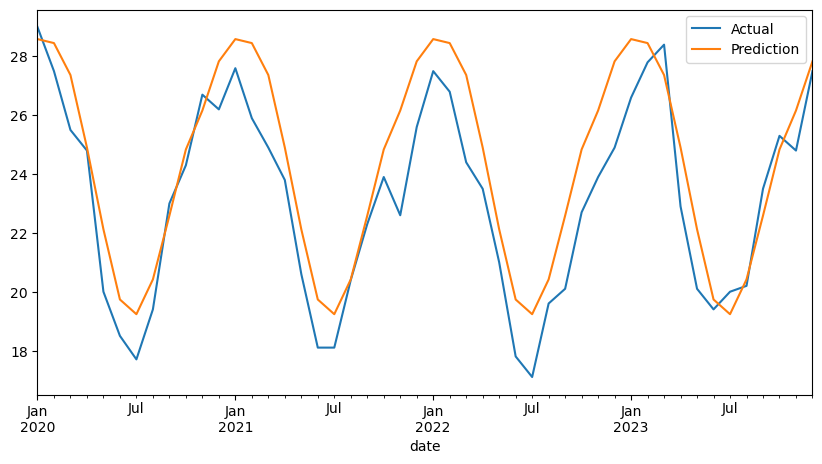

MAE: 1.3719504197438557
MSE: 2.580563763248477
MAPE: 0.06085266416491928
R-squared (r2) value: 0.7629244024672239


In [62]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Sydney Airport TEMP.csv")
print(df.isna().sum())
df.head()

df['date'] = pd.to_datetime(dict(year=df.Year, month=df.Month, day=1))
df["month"] = df["date"].dt.month
df["quarter"] = df["date"].dt.quarter
df["day_of_week"] = df["date"].dt.dayofweek



# Adding lagged values
num_lags = 12  # You can adjust the number of lagged values
for i in range(1, num_lags + 1):
    df[f"lag_{i}"] = df["Mean maximum temperature (°C)"].shift(i)

# Drop rows with NaN values introduced by lag
df = df.dropna()

training_mask = df["date"] < "2020-01-1"
training_data = df.loc[training_mask]
print(training_data.shape)

testing_mask = df["date"] >= "2020-01-1"
testing_data = df.loc[testing_mask]
print(testing_data.shape)
training_data = training_data.drop(columns=["date"])
testing_dates = testing_data["date"]
testing_data = testing_data.drop(columns=["date"])

X_train = training_data[[ "month", "quarter", "Year"]]
y_train = training_data["Mean maximum temperature (°C)"]

X_test = testing_data[["month", "quarter", "Year"]]
y_test = testing_data["Mean maximum temperature (°C)"]

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error,\
  mean_squared_error, r2_score

def evaluate_model(y_test, prediction):
  print(f"MAE: {mean_absolute_error(y_test, prediction)}")
  print(f"MSE: {mean_squared_error(y_test, prediction)}")
  print(f"MAPE: {mean_absolute_percentage_error(y_test, prediction)}")
  r2 = r2_score(y_test, prediction)
  print(f"R-squared (r2) value: {r2}")

def plot_predictions(testing_dates, y_test, prediction):
  df_test = pd.DataFrame({"date": testing_dates, "actual": y_test, "prediction": prediction })
  figure, ax = plt.subplots(figsize=(10, 5))
  df_test.plot(ax=ax, label="Actual", x="date", y="actual")
  df_test.plot(ax=ax, label="Prediction", x="date", y="prediction")
  plt.legend(["Actual", "Prediction"])
  plt.show()


from xgboost import XGBRegressor
import lightgbm as lgb
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV

# XGBoost
cv_split = TimeSeriesSplit(n_splits=4, test_size=100)
model = XGBRegressor()
parameters = {
    "max_depth": [3, 4, 6, 5, 10],
    "learning_rate": [0.01, 0.05, 0.1, 0.2, 0.3],
    "n_estimators": [100, 300, 500, 1000, 1500, 2000],
    "colsample_bytree": [0.3, 0.5, 0.7]
}


grid_search = GridSearchCV(estimator=model, cv=cv_split, param_grid=parameters)
grid_search.fit(X_train, y_train)

# Evaluating GridSearch results
prediction = grid_search.predict(X_test)
plot_predictions(testing_dates, y_test, prediction)
evaluate_model(y_test, prediction)

In [61]:
df.head()

,Product code,Bureau of Meteorology station number,Year,Month,Mean maximum temperature (°C),Quality,date,month,quarter,day_of_week,...,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12
12,IDCJAC0002,66037,1940,4,22.2,Y,1940-04-01,4,2,0,...,27.7,26.6,24.0,20.6,20.0,18.5,15.3,17.5,20.6,22.6
13,IDCJAC0002,66037,1940,5,18.8,Y,1940-05-01,5,2,2,...,27.3,27.7,26.6,24.0,20.6,20.0,18.5,15.3,17.5,20.6
14,IDCJAC0002,66037,1940,6,18.0,Y,1940-06-01,6,2,5,...,28.4,27.3,27.7,26.6,24.0,20.6,20.0,18.5,15.3,17.5
15,IDCJAC0002,66037,1940,7,17.1,Y,1940-07-01,7,3,0,...,22.2,28.4,27.3,27.7,26.6,24.0,20.6,20.0,18.5,15.3
16,IDCJAC0002,66037,1940,8,18.2,Y,1940-08-01,8,3,3,...,18.8,22.2,28.4,27.3,27.7,26.6,24.0,20.6,20.0,18.5


1 Lag

Product code                            0
Bureau of Meteorology station number    0
Year                                    0
Month                                   0
Mean maximum temperature (°C)           0
Quality                                 0
dtype: int64
(968, 11)
(48, 11)


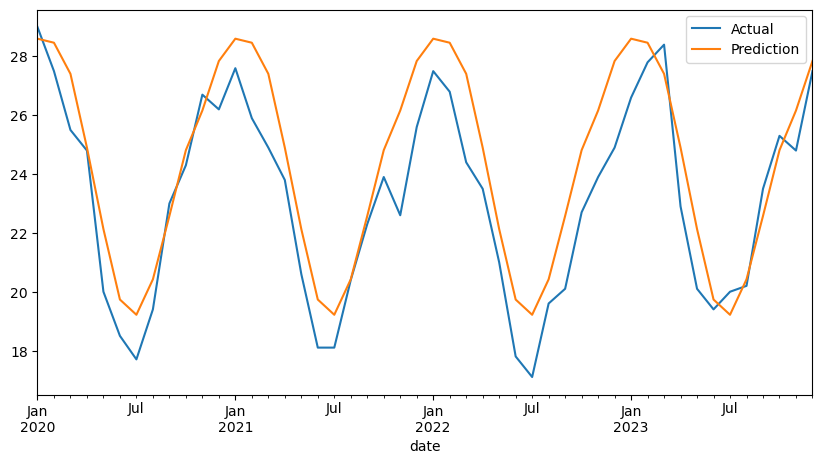

MAE: 1.3747334798177082
MSE: 2.5939028773346093
MAPE: 0.06094722079721057
R-squared (r2) value: 0.7616989421675928


In [63]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Sydney Airport TEMP.csv")
print(df.isna().sum())
df.head()

df['date'] = pd.to_datetime(dict(year=df.Year, month=df.Month, day=1))
df["month"] = df["date"].dt.month
df["quarter"] = df["date"].dt.quarter
df["day_of_week"] = df["date"].dt.dayofweek



# Adding lagged values
num_lags = 1  # You can adjust the number of lagged values
for i in range(1, num_lags + 1):
    df[f"lag_{i}"] = df["Mean maximum temperature (°C)"].shift(i)

# Drop rows with NaN values introduced by lag
df = df.dropna()

training_mask = df["date"] < "2020-01-1"
training_data = df.loc[training_mask]
print(training_data.shape)

testing_mask = df["date"] >= "2020-01-1"
testing_data = df.loc[testing_mask]
print(testing_data.shape)
training_data = training_data.drop(columns=["date"])
testing_dates = testing_data["date"]
testing_data = testing_data.drop(columns=["date"])

X_train = training_data[[ "month", "quarter", "Year"]]
y_train = training_data["Mean maximum temperature (°C)"]

X_test = testing_data[["month", "quarter", "Year"]]
y_test = testing_data["Mean maximum temperature (°C)"]

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error,\
  mean_squared_error, r2_score

def evaluate_model(y_test, prediction):
  print(f"MAE: {mean_absolute_error(y_test, prediction)}")
  print(f"MSE: {mean_squared_error(y_test, prediction)}")
  print(f"MAPE: {mean_absolute_percentage_error(y_test, prediction)}")
  r2 = r2_score(y_test, prediction)
  print(f"R-squared (r2) value: {r2}")

def plot_predictions(testing_dates, y_test, prediction):
  df_test = pd.DataFrame({"date": testing_dates, "actual": y_test, "prediction": prediction })
  figure, ax = plt.subplots(figsize=(10, 5))
  df_test.plot(ax=ax, label="Actual", x="date", y="actual")
  df_test.plot(ax=ax, label="Prediction", x="date", y="prediction")
  plt.legend(["Actual", "Prediction"])
  plt.show()


from xgboost import XGBRegressor
import lightgbm as lgb
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV

# XGBoost
cv_split = TimeSeriesSplit(n_splits=4, test_size=100)
model = XGBRegressor()
parameters = {
    "max_depth": [3, 4, 6, 5, 10],
    "learning_rate": [0.01, 0.05, 0.1, 0.2, 0.3],
    "n_estimators": [100, 300, 500, 1000, 1500, 2000],
    "colsample_bytree": [0.3, 0.5, 0.7]
}


grid_search = GridSearchCV(estimator=model, cv=cv_split, param_grid=parameters)
grid_search.fit(X_train, y_train)

# Evaluating GridSearch results
prediction = grid_search.predict(X_test)
plot_predictions(testing_dates, y_test, prediction)
evaluate_model(y_test, prediction)

Product code                            0
Bureau of Meteorology station number    0
Year                                    0
Month                                   0
Mean maximum temperature (°C)           0
Quality                                 0
dtype: int64
(969, 10)
(48, 10)


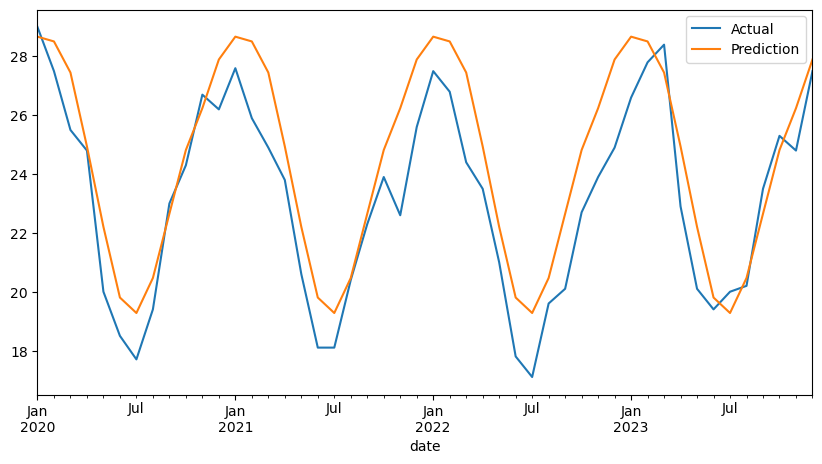

MAE: 1.4125828266143798
MSE: 2.7304978826593405
MAPE: 0.06270553982944567
R-squared (r2) value: 0.7491500011305426


In [64]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Sydney Airport TEMP.csv")
print(df.isna().sum())
df.head()

df['date'] = pd.to_datetime(dict(year=df.Year, month=df.Month, day=1))
df["month"] = df["date"].dt.month
df["quarter"] = df["date"].dt.quarter
df["day_of_week"] = df["date"].dt.dayofweek

training_mask = df["date"] < "2020-01-1"
training_data = df.loc[training_mask]
print(training_data.shape)

testing_mask = df["date"] >= "2020-01-1"
testing_data = df.loc[testing_mask]
print(testing_data.shape)
training_data = training_data.drop(columns=["date"])
testing_dates = testing_data["date"]
testing_data = testing_data.drop(columns=["date"])

X_train = training_data[[ "month", "quarter", "Year"]]
y_train = training_data["Mean maximum temperature (°C)"]

X_test = testing_data[["month", "quarter", "Year"]]
y_test = testing_data["Mean maximum temperature (°C)"]

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error,\
  mean_squared_error, r2_score

def evaluate_model(y_test, prediction):
  print(f"MAE: {mean_absolute_error(y_test, prediction)}")
  print(f"MSE: {mean_squared_error(y_test, prediction)}")
  print(f"MAPE: {mean_absolute_percentage_error(y_test, prediction)}")
  r2 = r2_score(y_test, prediction)
  print(f"R-squared (r2) value: {r2}")

def plot_predictions(testing_dates, y_test, prediction):
  df_test = pd.DataFrame({"date": testing_dates, "actual": y_test, "prediction": prediction })
  figure, ax = plt.subplots(figsize=(10, 5))
  df_test.plot(ax=ax, label="Actual", x="date", y="actual")
  df_test.plot(ax=ax, label="Prediction", x="date", y="prediction")
  plt.legend(["Actual", "Prediction"])
  plt.show()


from xgboost import XGBRegressor
import lightgbm as lgb
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV

# XGBoost
cv_split = TimeSeriesSplit(n_splits=4, test_size=100)
model = XGBRegressor()
parameters = {
    "max_depth": [10, 11, 12, 13, 14],
    "learning_rate": [0.01, 0.05, 0.1, 0.2, 0.3],
    "n_estimators": [100, 300, 500, 1000, 1500, 2000],
    "colsample_bytree": [0.3, 0.5, 0.7]
}


grid_search = GridSearchCV(estimator=model, cv=cv_split, param_grid=parameters)
grid_search.fit(X_train, y_train)

# Evaluating GridSearch results
prediction = grid_search.predict(X_test)
plot_predictions(testing_dates, y_test, prediction)
evaluate_model(y_test, prediction)